In [1]:
# Dependencies
import tweepy
import json
import numpy as np
from config import consumer_key, consumer_secret, access_token, access_token_secret
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [2]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
# Twitter API Keys
consumer_key = consumer_key
consumer_secret = consumer_secret
access_token = access_token
access_token_secret = access_token_secret

In [4]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [5]:
# Target Search Term
target_user_list = ["@CNN","@BBC","@CBSNews","@FoxNews","@nytimes"]
list_of_sentiments = []
average_sentiment = []
list_of_media_orgs = []

In [6]:
for target_user in target_user_list:
    #initialize tweet counter
    counter = 1

    # Variables for holding sentiments
    sentiments = []
    # Grab 100 tweets
    #public_tweets = api.search(target_term, count=100, result_type="recent")
    public_tweets = api.user_timeline(target_user, count=100, result_type="recent")    
     
    #reset sentiments
    compound_sum=0
    compound_avg=0
    compound = 0
    pos =0
    new=0
    net=0
    
    # Loop through all tweets
    for tweet in public_tweets:

        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter

        # Get Tweet ID, subtract 1, and assign to oldest_tweet
        #oldest_tweet = tweet['id'] - 1
        
        # Add sentiments for each tweet into a list
        sentiments.append({"News Outlet": target_user,
                        "Date": tweet["created_at"], 
                        "Compound": compound,
                        "Positive": pos,
                        "Negative": neu,
                        "Neutral": neg,
                        "Tweets Ago": counter,
                        "Tweets Text": tweet["text"],
                        "Source Account": tweet["user"]["screen_name"]})        
        # Add to counter 
        counter += 1
        compound_sum+=compound
    list_of_sentiments.append(sentiments)
    compound_avg=compound_sum/counter
    #average_sentiment.append({"news":target_user,"avg":compound_avg})
    average_sentiment.append(compound_avg)
    list_of_media_orgs.append(tweet["user"]["screen_name"])
    
list_of_sentiments
#average_sentiment
#list_of_media_orgs


[[{'Compound': 0.0,
   'Date': 'Sun Apr 29 04:46:03 +0000 2018',
   'Negative': 1.0,
   'Neutral': 0.0,
   'News Outlet': '@CNN',
   'Positive': 0.0,
   'Source Account': 'CNN',
   'Tweets Ago': 1,
   'Tweets Text': "The skeletal remains of more than 140 children and 200 baby llamas were found on the country's northern coast. It m… https://t.co/4BduUJRnN4"},
  {'Compound': 0.0,
   'Date': 'Sun Apr 29 04:31:21 +0000 2018',
   'Negative': 1.0,
   'Neutral': 0.0,
   'News Outlet': '@CNN',
   'Positive': 0.0,
   'Source Account': 'CNN',
   'Tweets Ago': 2,
   'Tweets Text': 'The crowd in Washington Township, Michigan, chants "Nobel! Nobel!" as President Trump talks about North Korea… https://t.co/7HduJQ92SN'},
  {'Compound': -0.9042,
   'Date': 'Sun Apr 29 04:15:06 +0000 2018',
   'Negative': 0.588,
   'Neutral': 0.412,
   'News Outlet': '@CNN',
   'Positive': 0.0,
   'Source Account': 'CNN',
   'Tweets Ago': 3,
   'Tweets Text': "A young woman killed in the attack at a Waffle House in Ten

In [7]:
# Convert sentiments to DataFrame
data_frame_collection = {}
count=0
for target_user in target_user_list:
#sentiments_pd = pd.DataFrame.from_dict(list_of_sentiments[count])
    data_frame_collection[target_user] = pd.DataFrame.from_dict(list_of_sentiments[count])
    data_frame_collection[target_user].to_csv('twitter_sentiments.csv',mode='a',index=False)
    count+=1
    
data_frame_collection



{'@BBC':     Compound                            Date  Negative  Neutral News Outlet  \
 0    -0.6369  Sat Apr 28 20:01:07 +0000 2018     0.652    0.250        @BBC   
 1     0.7650  Sat Apr 28 19:06:03 +0000 2018     0.694    0.000        @BBC   
 2     0.0000  Sat Apr 28 18:01:06 +0000 2018     1.000    0.000        @BBC   
 3     0.5994  Sat Apr 28 17:02:00 +0000 2018     0.786    0.000        @BBC   
 4     0.0000  Sat Apr 28 16:29:48 +0000 2018     1.000    0.000        @BBC   
 5     0.0000  Sat Apr 28 16:03:03 +0000 2018     1.000    0.000        @BBC   
 6    -0.7906  Sat Apr 28 15:00:23 +0000 2018     0.611    0.389        @BBC   
 7     0.0000  Sat Apr 28 14:10:02 +0000 2018     1.000    0.000        @BBC   
 8     0.0000  Sat Apr 28 13:00:23 +0000 2018     1.000    0.000        @BBC   
 9     0.0516  Sat Apr 28 12:00:21 +0000 2018     0.789    0.101        @BBC   
 10    0.0000  Sat Apr 28 11:08:45 +0000 2018     1.000    0.000        @BBC   
 11   -0.2023  Sat Apr 28 11:00:

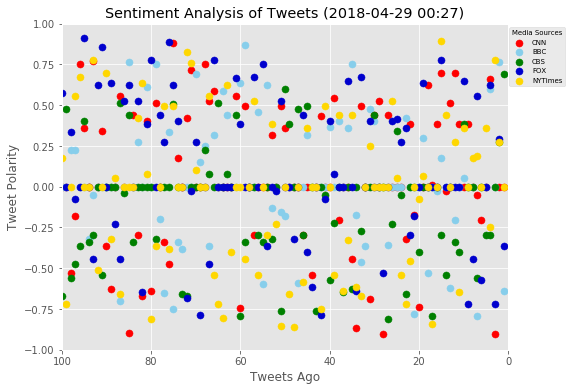

In [54]:
# Create plot
#b: blue
#g: green
#r: red
#c: cyan
#m: magenta
#y: yellow
#k: black
#w: white

fig=plt.figure(figsize=(8,10))

x_vals = data_frame_collection['@CNN']["Tweets Ago"]
y_vals = data_frame_collection['@CNN']["Compound"]
plt.scatter(x_vals,y_vals, marker="o", color="red", s=50)

x_vals = data_frame_collection['@BBC']["Tweets Ago"]
y_vals = data_frame_collection['@BBC']["Compound"]
plt.scatter(x_vals,y_vals, marker="o", color="skyblue", s=50)

x_vals = data_frame_collection['@CBSNews']["Tweets Ago"]
y_vals = data_frame_collection['@CBSNews']["Compound"]
plt.scatter(x_vals,y_vals, marker="o", color="green", s=50)

x_vals = data_frame_collection['@FoxNews']["Tweets Ago"]
y_vals = data_frame_collection['@FoxNews']["Compound"]
plt.scatter(x_vals,y_vals, marker="o", color="mediumblue", s=50)

x_vals = data_frame_collection['@nytimes']["Tweets Ago"]
y_vals = data_frame_collection['@nytimes']["Compound"]
plt.scatter(x_vals,y_vals, marker="o", color="gold", s=50)

# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now})")
plt.xlim([100,0])
plt.ylim([-1,1])

plt.grid(True)
L=plt.legend(bbox_to_anchor=(0.995, 1),prop={'size': 7})
L.get_texts()[0].set_text('CNN')
L.get_texts()[1].set_text('BBC')
L.get_texts()[2].set_text('CBS')
L.get_texts()[3].set_text('FOX')
L.get_texts()[4].set_text('NYTimes')
L.set_title("Media Sources",prop = {'size':'x-small'})

fig.set_size_inches(8, 6, forward=True)
plt.savefig('sentiment_analysis.png',dpi=200)
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()

In [9]:
average_sentiment

[0.055825742574257445,
 0.03224752475247525,
 -0.09405346534653464,
 0.10165148514851487,
 -0.025373267326732677]

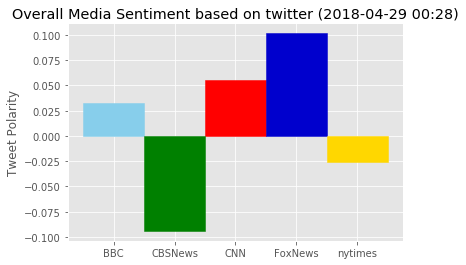

In [55]:
# Convert average sentiments to DataFrame
media_bar=plt.bar(list_of_media_orgs, average_sentiment, color='r',align="center",width=1.0)
media_bar[0].set_color('red')
media_bar[1].set_color('skyblue')
media_bar[2].set_color('green')
media_bar[3].set_color('mediumblue')
media_bar[4].set_color('gold')


# Give our chart some labels and a tile
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Overall Media Sentiment based on twitter ({now})")
plt.ylabel("Tweet Polarity")
plt.savefig('overall_media_sentiment.png',dpi=200)